## sweetviz용 데이터 

### 전체 데이터 불러오기

In [313]:
df = pd.read_csv('./data/MACH_data/data.csv', delimiter='\t')
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,1,4,3,60,1,1,2,Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,9925.0,1.0,6.0,14218.0,2.0,16.0,25499.0,4.0,...,2048.0,1080.0,1,12,1,10,2,2,1,business
73485,5.0,9.0,5816.0,5.0,4.0,4368.0,1.0,15.0,7246.0,1.0,...,1440.0,900.0,1,2,3,60,2,1,2,sociology
73486,2.0,17.0,5353.0,1.0,18.0,6846.0,1.0,9.0,4920.0,1.0,...,1280.0,1024.0,1,1,1,60,2,1,3,NaN
73487,4.0,15.0,7974.0,3.0,9.0,7901.0,5.0,17.0,8647.0,3.0,...,414.0,736.0,1,3,1,10,1,1,4,Business


### 이상치 확인

#### 인종 데이터에서 '0' 발견. 
> `어떻게 처리할지 정해야 함`

In [314]:
df['race'].value_counts()

60    48702
10    10815
70     7327
30     3587
0      1110
20     1055
50      816
40       77
Name: race, dtype: int64

#### 전공 데이터는 주관식 답변으로 제각각임.. 
> 1차적으로 전공 유무(`True`/`False`)로 비교하기로 함

In [273]:
df['major'].isnull().sum()

26338

In [274]:
df['major']

0                     Marketing 
1                    mathematics
2                      Chemistry
3        international relations
4                     Management
                  ...           
73484                   business
73485                  sociology
73486                        NaN
73487                   Business
73488                        NaN
Name: major, Length: 73489, dtype: object

In [275]:
df['major'] = df['major'].notnull()

In [276]:
df['major'].value_counts()

True     47151
False    26338
Name: major, dtype: int64

> __라벨 데이터를 카테고리 데이터__로 변경  
 EDA분석을 쉽게 하기 위해

In [277]:
def tran_cate(df, cate, x, y):
    df[cate] = df[cate].astype('str').replace(x, y)
    return df[cate]

In [278]:
cates = {
    'education' : ['Less than high school','High school','University degree','Graduate degree'],
    'urban' : ['Rural','Suburban','Urban'],
    'gender' : ['Male','Female','Other'],
    'engnat' : ['Yes','No'],
    'hand' : ['Right','Left','Both'],
    'religion' : ['Agnostic','Atheist','Buddhist','Christian(Catholic)','Christian(Mormon)','Christian(Protestant)','Christian(othrer)','Hindu','Jewish','Muslim','Sikh','Other'],
    'orientation' : ['Heterosexual','Bisexual','Homosexual','Asexual','Other'],
    'race' : ['Asian','Arab','Black','Indigenous Australian','Native American','White','Other'],
    'voted' : ['Yes','No'],
    'married' : ['Never married','Currently married','Previously married'],
}

In [279]:
for x in list(cates.keys()):
    for idx, y in enumerate(cates[x]):
        if x == 'race':
            tran_cate(df, x, "{}".format((idx+1)*10) ,y)
        else:    
            tran_cate(df, x, "{}".format(idx+1) ,y)

In [280]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,Right,Christian(othrer),Heterosexual,Black,Yes,Currently married,5,True
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,Right,Agnostic,Heterosexual,White,No,Never married,2,True
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,Right,Atheist,Bisexual,Asian,No,Never married,2,True
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,Right,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,True
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,Right,Christian(Catholic),Homosexual,White,Yes,Never married,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,9925.0,1.0,6.0,14218.0,2.0,16.0,25499.0,4.0,...,2048.0,1080.0,Right,Other,Heterosexual,Asian,No,Currently married,1,True
73485,5.0,9.0,5816.0,5.0,4.0,4368.0,1.0,15.0,7246.0,1.0,...,1440.0,900.0,Right,Atheist,Homosexual,White,No,Never married,2,True
73486,2.0,17.0,5353.0,1.0,18.0,6846.0,1.0,9.0,4920.0,1.0,...,1280.0,1024.0,Right,Agnostic,Heterosexual,White,No,Never married,3,False
73487,4.0,15.0,7974.0,3.0,9.0,7901.0,5.0,17.0,8647.0,3.0,...,414.0,736.0,Right,Buddhist,Heterosexual,Asian,Yes,Never married,4,True


### EDA용 데이터를 .csv 로 저장

In [281]:
df.to_csv('./data/data_for_eda.csv', index=False)

## sweetviz 사용

In [282]:
import sweetviz as sv

In [284]:
df_eda = pd.read_csv('./data/data_for_eda.csv')
df_eda.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,Right,Christian(othrer),Heterosexual,Black,Yes,Currently married,5,True
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,Right,Agnostic,Heterosexual,White,No,Never married,2,True
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,Right,Atheist,Bisexual,Asian,No,Never married,2,True
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,Right,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,True
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,Right,Christian(Catholic),Homosexual,White,Yes,Never married,2,True


In [285]:
data_rep = sv.analyze(df_eda)

In [286]:
data_rep.show_html('sweetviz_test_1.html')

Report sweetviz_test_1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 분석 데이터 확인 후 컬럼 재확인

> 1. Q_ 컬럼들에서 A는 주로 어떤질문에 어떤 답변이 많았는지 체크  
2. age의 이상치 발견 `100세 이상 데이터 어떻게??`  
3. race, religion의 '0' `어떻게 처리할까요??`  
4. T_ 컬럼들에서 주로 무슨 답변을 했을지 체크  

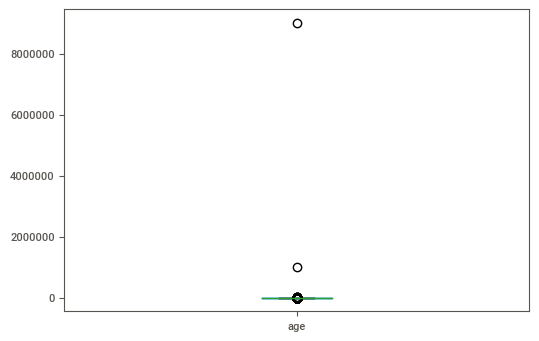

In [287]:
df_eda['age'].plot(kind='box')

In [292]:
df_eda['age'].value_counts()

18        4476
17        3846
20        3610
21        3485
19        3416
          ... 
476          1
662          1
87           1
999999       1
410          1
Name: age, Length: 100, dtype: int64

In [302]:
age_value = pd.DataFrame(df_eda['age'].value_counts())
age_value

,age
18,4476
17,3846
20,3610
21,3485
19,3416
...,...
476,1
662,1
87,1
999999,1


In [305]:
age_value[age_value.values < 5]

,age
84,4
88,4
99,3
92,3
81,3
85,3
100,2
91,2
83,2
90,2


In [312]:
age_value[age_value.index >= 100]

,age
100,2
1989,1
310,1
321,1
1984,1
777,1
9000,1
1996,1
500,1
1997,1


### compare_intra 사용

> voted에서 0데이터 발견... __`임시로 no로 체크`__ 

In [316]:
df_eda['voted'].value_counts()

No     40614
Yes    32294
0        581
Name: voted, dtype: int64

In [322]:
df_eda['voted'] = df_eda['voted'].str.replace('0', "No")

In [329]:
df_eda['voted'].value_counts()

No     41195
Yes    32294
Name: voted, dtype: int64

In [337]:
cates.keys()

dict_keys(['education', 'urban', 'gender', 'engnat', 'hand', 'religion', 'orientation', 'race', 'voted', 'married'])

In [340]:
feature_config = sv.FeatureConfig(force_cat=['education', 'urban', 'gender', 'engnat', 'hand', 'religion', 'orientation', 'race', 'voted', 'married'])

In [343]:
comint_rep = sv.compare_intra(df_eda, df_eda['voted'] == "Yes", ["Yes", "No"])

In [344]:
comint_rep.show_html('sweetviz_compare_voted.html')

Report sweetviz_compare_voted.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
import matplotlib.pyplot as plt

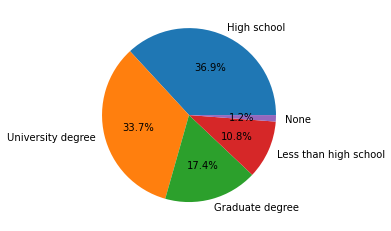

In [6]:
df['education'].value_counts().plot(kind='pie', autopct="%.1f%%", 
                                    labels=['High school', 'University degree', 'Graduate degree', 'Less than high school', 'None'])
plt.ylabel('');

In [13]:
pd.DataFrame(df['major'].value_counts())

,major
Psychology,1655
Business,1328
English,1200
psychology,1196
Engineering,889
...,...
Business Innovation,1
Business communications,1
I will attend law school,1
"Graphic design and minor in architecture, and",1


In [54]:
df['major_l'] = df['major'].str.lower()

In [55]:
df['major_l'] = df['major_l'].str.strip()

In [56]:
df['major_l'].value_counts()

psychology                        3601
business                          2042
engineering                       1836
english                           1577
computer science                  1479
                                  ... 
admnistration                        1
pharmaceuticals                      1
economics & mandarin (chinese)       1
arts & creative technology           1
chiropractic                         1
Name: major_l, Length: 6686, dtype: int64

In [60]:
df_1 = pd.DataFrame(df['major_l'].value_counts())
df_1[df_1['major_l']== 1]

,major_l
wildlife-management,1
machinery,1
physics or chemistry,1
physical education/coaching,1
management science and technology,1
...,...
admnistration,1
pharmaceuticals,1
economics & mandarin (chinese),1
arts & creative technology,1


In [28]:
df['familysize'].value_counts()

2             29069
3             17691
1             11090
4              7617
5              3052
0              2264
6              1292
7               619
8               344
9               185
10               94
11               60
12               41
14               16
13               15
15               10
17                3
44                3
20                3
21                3
16                3
96                1
2147483647        1
999               1
100               1
67                1
34                1
2137              1
30                1
24                1
900000            1
23                1
22                1
18                1
236               1
48                1
Name: familysize, dtype: int64

In [43]:
df['Q1A'].value_counts()

5.0    22539
4.0    16463
1.0    14150
2.0    11911
3.0     8423
Name: Q1A, dtype: int64

In [46]:
df_1 = df[df['voted'] == 2]

In [48]:
df_1['education'].value_counts()

2    17310
3    10336
1     7475
4     5034
0      459
Name: education, dtype: int64